# Polynomial Regression to simulate outbreak

#### Author: Yiran Jing

#### Date: Feb 2020


## Contents:
1. EDA and Feature Engineering
1. Polynomial regression
   1. Chinese total comfirmed cases
   2. For each province
   
## Summary
For Polynomial regression, 
- China total comfirmed cases, optimal degree is 2, and seems fit well.
- Hubei, optimal degree is 2.
- Ex-hubei, optimal degree is 3.

In [12]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
## Update data from DXY
! cd ../data_processing && python DXY_AreaData_query.py

2020-02-11 18:31:43Update records successfully to ../data/DXY_Chinese.csv
Save area daily dataset (English) into ../data/DXYArea.csv
CPU times: user 185 ms, sys: 56.3 ms, total: 241 ms
Wall time: 13 s


In [3]:
## Load data 
df = pd.read_csv("../data/DXYArea.csv")
"""
Data Cleaning 
"""
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] != df['date'].max()] # remove todays' records (since it can be incompleted)
#df = df[df['date'] < datetime.datetime(2020, 2, 10)]

df.tail(3) # check new

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
6084,2020-02-10,泰国,TH,NaN,NaN,32,0,8,0,64,24
6085,2020-02-10,美国,US,NaN,NaN,12,0,3,0,64,9
6086,2020-02-10,越南,VN,NaN,NaN,14,0,3,0,64,11


### EDA

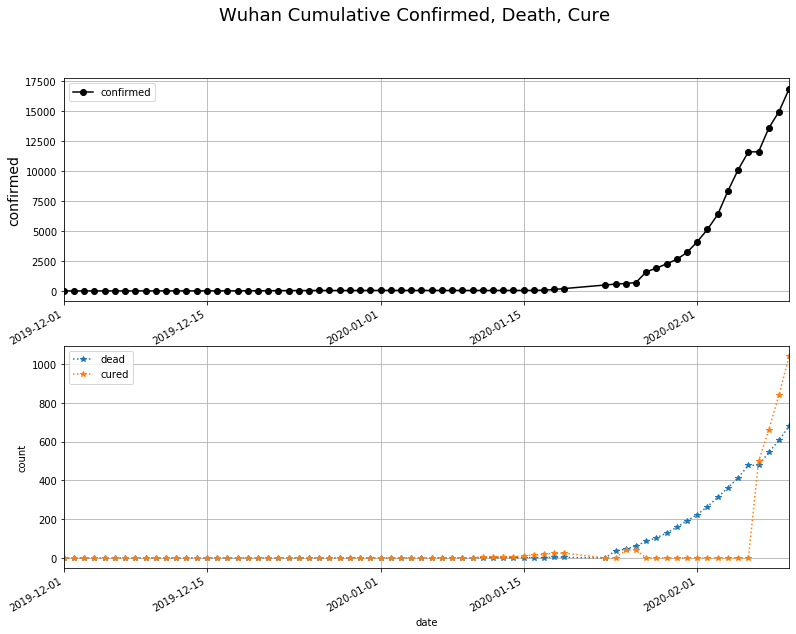

In [4]:
# Input City name or Province name
draw_city_trend("Wuhan", df) # city 

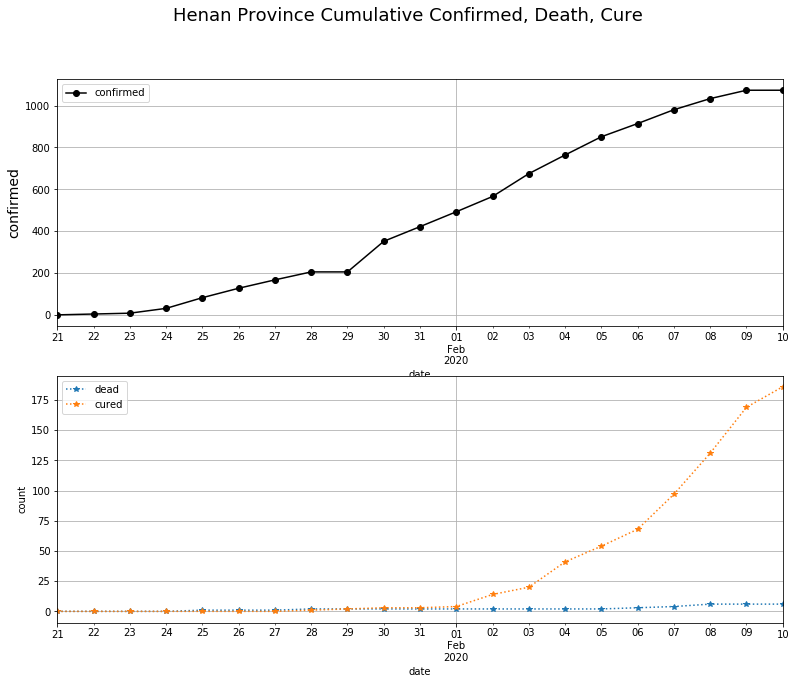

In [5]:
draw_province_trend("Henan Province", get_province_df(df, "Henan Province"))

## Polynomial regression

### Case1: Overall China

In [6]:
"""
Sum up all province within China
"""
# China total
China_df = df[df['date'] > datetime.datetime(2020, 1, 14)] 

China_total = get_China_total(China_df)

Train, Test = split_train_test_by_date(China_total, 5)

X_train = Train['Days']
y_train = Train['confirmed']
X_test =  Test['Days']
y_test = Test['confirmed']

Train dataset: data before 2020-02-05 00:00:00 
Test dataset: the last 5 days


In [7]:
China_total.tail()

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
4365,2020-02-06,中国,CN,NaN,NaN,31161,26359,1540,636,60,28985
4711,2020-02-07,中国,CN,NaN,NaN,34594,27657,2052,723,61,31819
5056,2020-02-08,中国,CN,NaN,NaN,37162,28942,2651,812,62,33699
5401,2020-02-09,中国,CN,NaN,NaN,40235,23589,3283,909,63,36043
5746,2020-02-10,中国,CN,NaN,NaN,40261,23589,3494,909,64,35858


Degree 1:
RMSE of training set is 3327.0749440310683
R2 score of training set is 0.794942880545626
MAPE of training set is 13.427828608514972

RMSE of test set is 14945.125973721522
R2 score of test set is -9.889488095433203
MAPE of test set is 0.413596554579367
---------------------------------------

Degree 3:
RMSE of training set is 193.38392502410292
R2 score of training set is 0.9993072278405802
MAPE of training set is 0.4302435502672971

RMSE of test set is 8221.408688966983
R2 score of test set is -2.2953441701975885
MAPE of test set is 0.16482727531210428
---------------------------------------

Degree 2:
RMSE of training set is 660.4327677582941
R2 score of training set is 0.9919200827916446
MAPE of training set is 2.938233899695324

RMSE of test set is 2297.268612930272
R2 score of test set is 0.7427046945911604
MAPE of test set is 0.049296968288941014
---------------------------------------



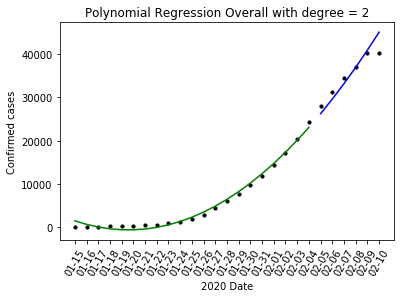

In [8]:
"""
Model selection:
  find optimal degree level
  Then draw plot using the optimal degree
"""
# select the best degree 
create_polynomial_regression_model(1, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Overall", China_total , X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = True)

**based on the result above, we can clearly see that degree = 2 gives us best estimation. So now we use degree = 2 to predict the next 4 days**


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 1175.7482813623826
R2 score of training set is 0.9929067169045412
MAPE of training set is 1.719556067224421

---------------------------------------



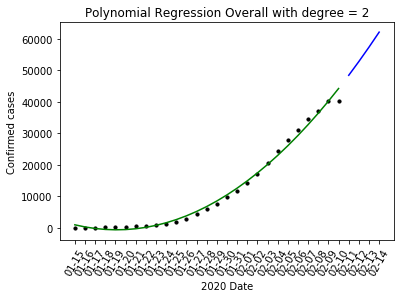

In [9]:
print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Overall", China_total)

### Case2: Each Province

Train dataset: data before 2020-02-05 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 2376.2479252353096
R2 score of training set is 0.7614541938398244
MAPE of training set is 9.491117576179665

RMSE of test set is 12506.769068730779
R2 score of test set is -10.411292384639474
MAPE of test set is 0.47553978983321943
---------------------------------------

Degree 3:
RMSE of training set is 144.61227675608097
R2 score of training set is 0.9991165161569836
MAPE of training set is 0.28643713984214675

RMSE of test set is 5867.7637462218545
R2 score of test set is -1.5118274975403034
MAPE of test set is 0.15225125977178583
---------------------------------------



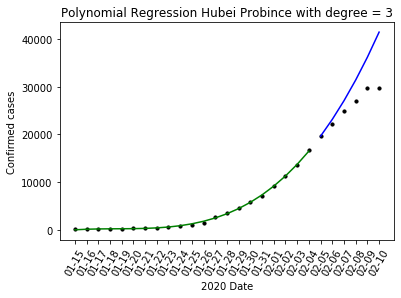

Degree 2:
RMSE of training set is 643.0506416213551
R2 score of training set is 0.982530573971968
MAPE of training set is 2.689285521563294

RMSE of test set is 2192.314386234332
R2 score of test set is 0.6493690576383642
MAPE of test set is 0.08591123656028593
---------------------------------------



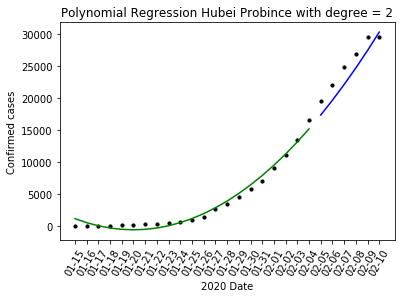


🍎Forescast the next 4 days
Degree 3:
RMSE of training set is 928.8052834738867
R2 score of training set is 0.9916189740072924
MAPE of training set is 1.8726733205385584

---------------------------------------



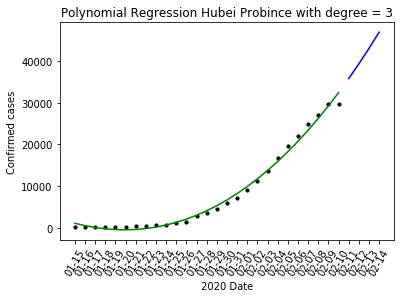

In [10]:
# See Hubei Province 
Hubei= get_province_df(China_df, "Hubei Province")
 
X_train, X_test, y_train, y_test = data_processing(Hubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = True)
create_polynomial_regression_model(2, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(3, "Hubei Probince", Hubei)

Train dataset: data before 2020-02-05 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 3327.0749440310683
R2 score of training set is 0.794942880545626
MAPE of training set is 13.427828608514972

RMSE of test set is 14945.125973721522
R2 score of test set is -9.889488095433203
MAPE of test set is 0.413596554579367
---------------------------------------

Degree 3:
RMSE of training set is 193.38392502410292
R2 score of training set is 0.9993072278405802
MAPE of training set is 0.4302435502672971

RMSE of test set is 8221.408688966983
R2 score of test set is -2.2953441701975885
MAPE of test set is 0.16482727531210428
---------------------------------------

Degree 2:
RMSE of training set is 660.4327677582941
R2 score of training set is 0.9919200827916446
MAPE of training set is 2.938233899695324

RMSE of test set is 2297.268612930272
R2 score of test set is 0.7427046945911604
MAPE of test set is 0.049296968288941014
---------------------------------------



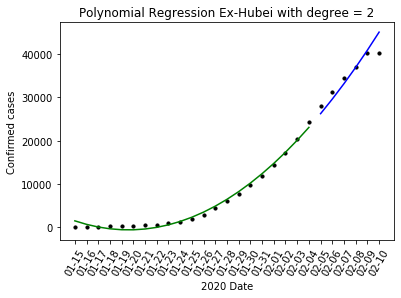


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 1175.7482813623826
R2 score of training set is 0.9929067169045412
MAPE of training set is 1.719556067224421

---------------------------------------



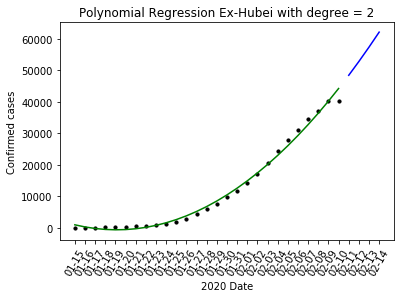

In [11]:
# See Hubei Province 
NotHubei= China_df[(China_df['province']!="Hubei Province") & (China_df['province'].isnull()) 
                   & (df['countryCode']=='CN') ]


X_train, X_test, y_train, y_test = data_processing(NotHubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Ex-Hubei", NotHubei)